In [3]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(2448, 3264)


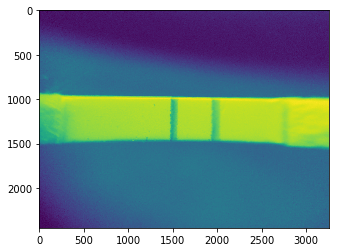

In [5]:
img = cv2.imread('/home/vikas/Desktop/Vikas_Data/Projects/Neva_labs/Imagefolder/IMG_3086.JPG') #here I have use for worst case  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
print(np.shape(gray))
plt.imshow(gray)
plt.show()

In [6]:
threshold=127
max_value=255
kernel=(6,6)

In [7]:
#Here includes Thresholding as well as morphological operations 

ret,op1=cv2.threshold(gray,threshold,max_value,cv2.THRESH_BINARY)
opening = cv2.morphologyEx(op1, cv2.MORPH_OPEN, kernel)
dilation = cv2.dilate(opening,kernel,iterations = 3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
img1= cv2.morphologyEx(closing, cv2.MORPH_ERODE, kernel)
img1=cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
print(img1.shape)

(2448, 3264)


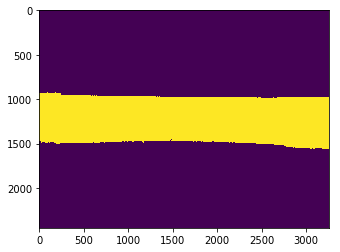

In [8]:
plt.imshow(img1)
plt.show()

In [9]:
#masking out image with mask 
src1_mask=img1
mask_out=cv2.subtract(img1,gray)
mask_out=cv2.subtract(src1_mask,mask_out)
print(np.shape(mask_out))
#backtorgb = cv2.cvtColor(mask_out,cv2.COLOR_GRAY2RGB)


(2448, 3264)


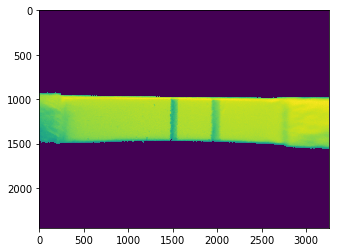

In [10]:
plt.imshow(mask_out)

In [11]:
points = np.argwhere(img1!=0) # find pixels rather than black pixels 
np.shape(points)


(1715993, 2)

In [12]:
points = np.fliplr(points)
points.shape

(1715993, 2)

In [13]:
x, y, w, h = cv2.boundingRect(points)
crop = img[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

# display
# cv2.imshow("Cropped and thresholded image", thresh_crop) 

In [14]:
np.shape(crop)

(650, 3264, 3)

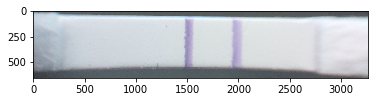

In [15]:

plt.imshow(crop)

In [105]:
# cv2.imshow("Cropped and thresholded image", ) 